# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
# here is a Python list:
a = [1, 2, 3, 4, 5, 6]
# get a list containing the last 3 elements of a
l = [a[len(a)-3],a[len(a)-2],a[len(a)-1]]
# reverse the list
r = a[::-1]
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
s = [n*n for n in a]
print(l)
print(r)
print(s)

[4, 5, 6]
[6, 5, 4, 3, 2, 1]
[1, 4, 9, 16, 25, 36]


In [2]:
# create a numpy array from this list
import numpy as np
b = np.array(a)
print(b)

[1 2 3 4 5 6]


In [3]:
# find the mean of b
print(b.mean())

3.5


In [4]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
print(np.square(b))

[ 1  4  9 16 25 36]


In [5]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2,3)
print(b)


[[1 2 3]
 [4 5 6]]


In [6]:
print(b[0].mean())
print(b[1].mean())

2.0
5.0


In [7]:
# find the mean value of each column
for i in range(3):
    print(b[:,i].mean())

2.5
3.5
4.5


In [8]:
# find the third column of b
print(b[:,2])

[3 6]


In [9]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd 
df = pd.read_csv('../data/starbucks_clean.csv')

In [10]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
calories = np.array(df['calories'])
print(calories.mean())


193.87190082644628


In [12]:
# how many different categories of beverages are there?
categories = set()
for cat in df['beverage_category']:
    categories.add(cat)
print(len(categories))

9


In [24]:
# what is the average # calories for each beverage category?
lastcat = 'coffee'
index = 0
sum = 0
count = 0
for cat in df['beverage_category']:
    if cat != lastcat:
        print(lastcat + ' avg: ' + str(sum/count))
        count = 0
        sum = 0
        lastcat = cat
    else:
        count += 1
        sum += calories[index]
    index += 1

coffee avg: 4.25
classic espresso drinks avg: 141.40350877192984
signature espresso drinks avg: 253.84615384615384
tazo tea drinks avg: 180.7843137254902
shaken iced beverages avg: 117.6470588235294
smoothies avg: 282.5
frappuccino blended coffee avg: 280.2857142857143
frappuccino light blended coffee avg: 169.0909090909091


In [26]:
# what beverage preparation includes the most sugar on average?
sugars = np.array(df['sugars'])
index = 0
preptoavg = {}
for prep in df['beverage_prep']:
    if prep in preptoavg:
        preptoavg[prep][0] += sugars[index]
        preptoavg[prep][1] += 1
    else:
        preptoavg[prep] = [sugars[index],1]
    index += 1
for p in preptoavg:
    print(p + ' avg: ' + str(preptoavg[p][0]/preptoavg[p][1]))

Short avg: 8.25
Tall avg: 14.714285714285714
Grande avg: 20.0
Venti avg: 27.714285714285715
Short Nonfat Milk avg: 17.0
2% Milk avg: 30.98
Soymilk avg: 31.848484848484848
Tall Nonfat Milk avg: 28.52173913043478
Grande Nonfat Milk avg: 38.61538461538461
Venti Nonfat Milk avg: 50.04545454545455
Solo avg: 0.0
Doppio avg: 0.0
Whole Milk avg: 55.6875


In [28]:
# what is the average % daily value calcium content for each beverage?
calcium = np.array(df["calcium"])
lastbev = 'brewed coffee'
index = 0
sum = 0
count = 0
for bev in df['beverage']:
    if bev != lastbev:
        print(lastbev + ' avg percent daily value calcium content: ' + str(sum/count))
        count = 0
        sum = 0
        lastbev = bev
    else:
        count += 1
        sum += calcium[index]
    index += 1

brewed coffee avg percent daily value calcium content: 0.5
caffè latte avg percent daily value calcium content: 36.36363636363637
caffè mocha without whipped cream avg percent daily value calcium content: 31.363636363636363
vanilla latte or other flavoured latte avg percent daily value calcium content: 34.09090909090909
caffè americano avg percent daily value calcium content: 2.0
cappuccino avg percent daily value calcium content: 23.181818181818183
espresso avg percent daily value calcium content: 0.0
skinny latte any flavour avg percent daily value calcium content: 38.333333333333336
caramel macchiato avg percent daily value calcium content: 29.545454545454547
white chocolate mocha without whipped cream avg percent daily value calcium content: 42.72727272727273
hot chocolate without whipped cream avg percent daily value calcium content: 36.36363636363637
caramel apple spice without whipped cream avg percent daily value calcium content: 0.0
tazo tea avg percent daily value calcium con

In [32]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
proteins = np.array(df["protein"])
optimalindex = 0
maxval = -1000
for i in range(len(proteins)):
    if 20*proteins[i] - calories[i] > maxval:
        maxval = 20*proteins[i]-calories[i]
        optimalindex = i
beverages = np.array(df["beverage"])
preps = np.array(df["beverage_prep"])
print("Drink: " + beverages[optimalindex] + " Prep: " + preps[optimalindex])

Drink: caffè latte Prep: Venti Nonfat Milk


<AxesSubplot:ylabel='Frequency'>

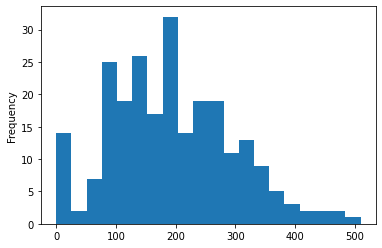

In [34]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt 
df["calories"].plot.hist(bins = 20)


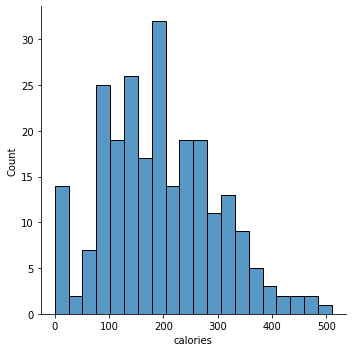

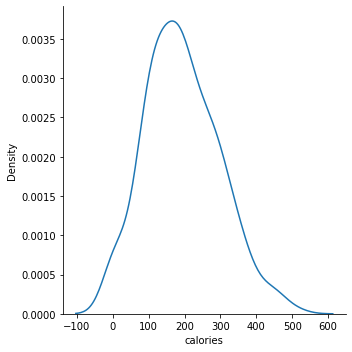

In [41]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.displot(data=df["calories"],bins = 20)
sns.displot(data=df["calories"],kind = "kde")

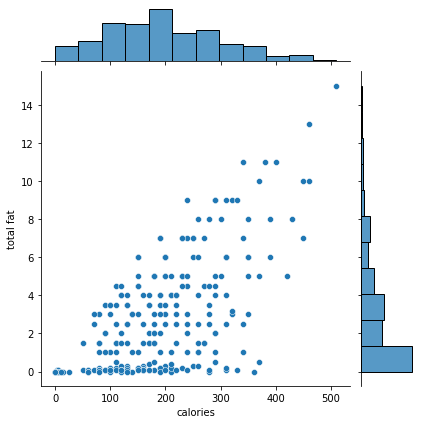

In [42]:
# plot calories against total fat using seaborn
sns.jointplot(df["calories"],df["total fat"])

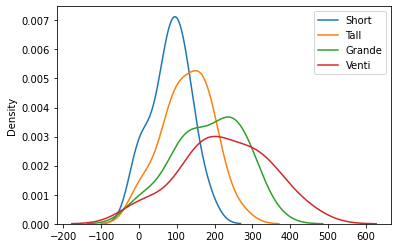

In [60]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
index = 0
short_cals = []
tall_cals = []
grande_cals = []
venti_cals = []
for prep in df["beverage_prep"]:
    if len(prep) >= 5 and prep[:5] == "Short":
        short_cals.append(calories[index])
    elif len(prep) >= 4 and prep[:4] == "Tall":
        tall_cals.append(calories[index])
    elif len(prep) >= 6 and prep[:6] == "Grande":
        grande_cals.append(calories[index])
    elif len(prep) >= 5 and prep[:5] == "Venti":
        venti_cals.append(calories[index])
    index += 1
fig,ax = plt.subplots()
sns.kdeplot(data=short_cals,ax=ax,label = "Short")
sns.kdeplot(data=tall_cals,ax=ax,label = "Tall")
sns.kdeplot(data=grande_cals,ax=ax,label = "Grande")
sns.kdeplot(data=venti_cals,ax=ax,label = "Venti")
ax.legend()